In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns', None)
%matplotlib inline


In [2]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
data.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [4]:
data.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
cat_feat = []
for column in data.columns:
  if len(data[column].unique()) <= 5:
    cat_feat.append(column)
print(cat_feat)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


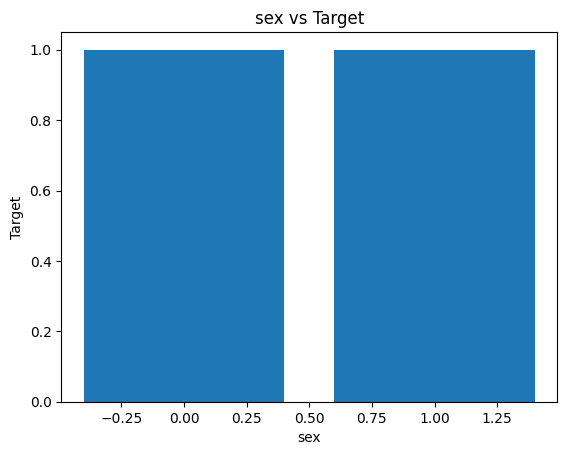

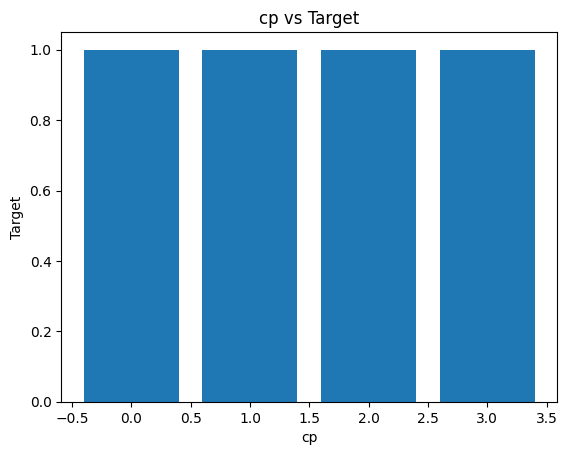

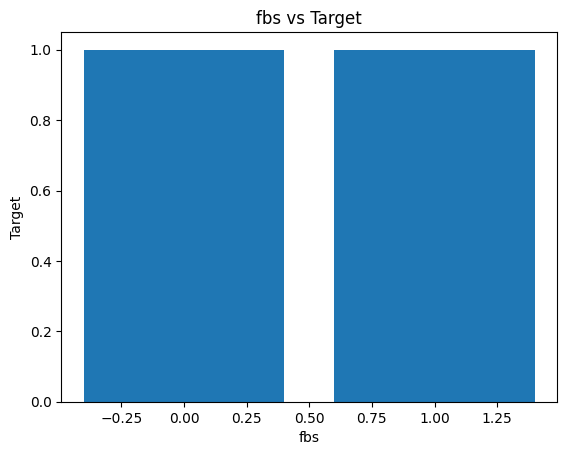

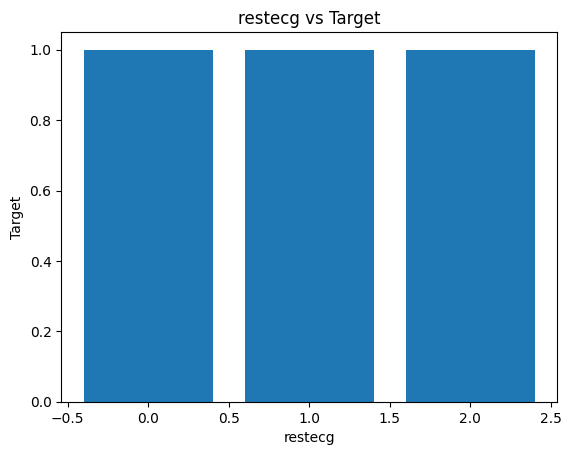

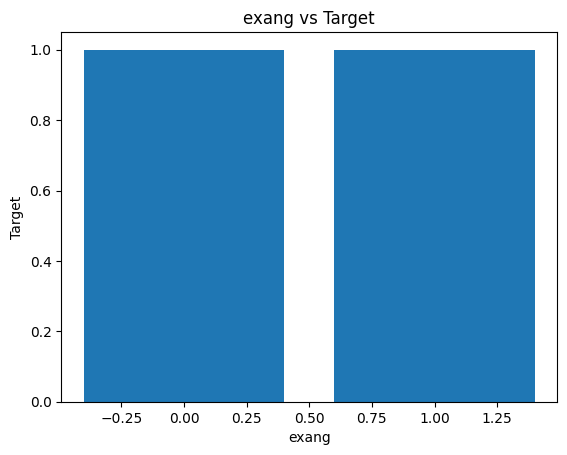

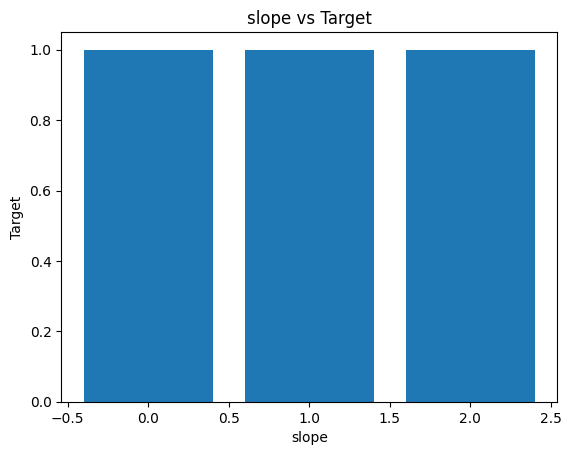

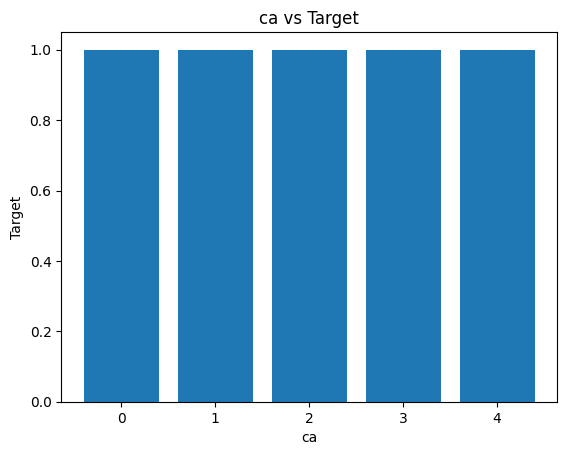

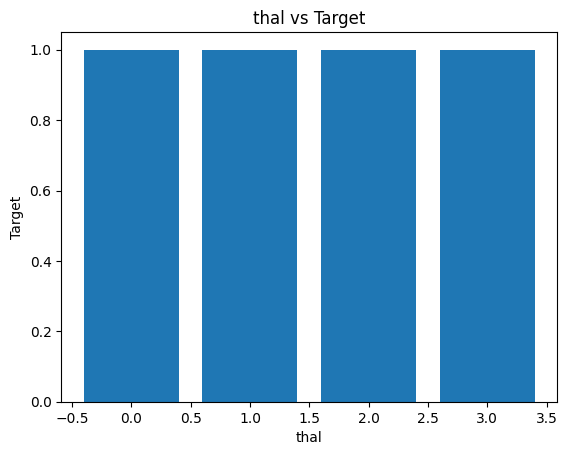

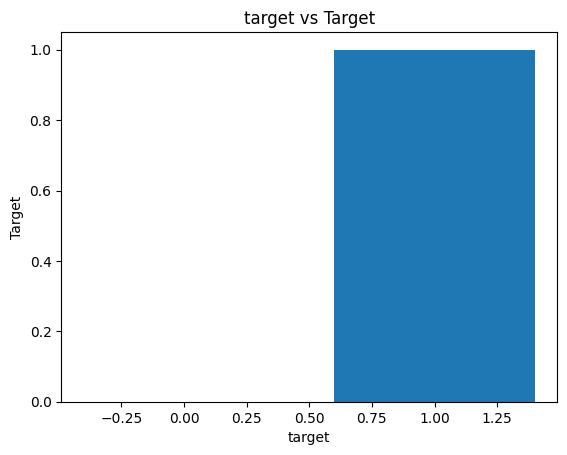

In [8]:
for feat in cat_feat:
  data2 = data.copy()
  plt.bar(data2[feat], data2["target"])
  plt.xlabel(feat)
  plt.ylabel("Target")
  plt.title(f"{feat} vs Target")
  plt.show()

In [9]:
cont_feat = []
for column in data.columns:
    if column not in cat_feat:
        cont_feat.append(column)
print(cont_feat)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


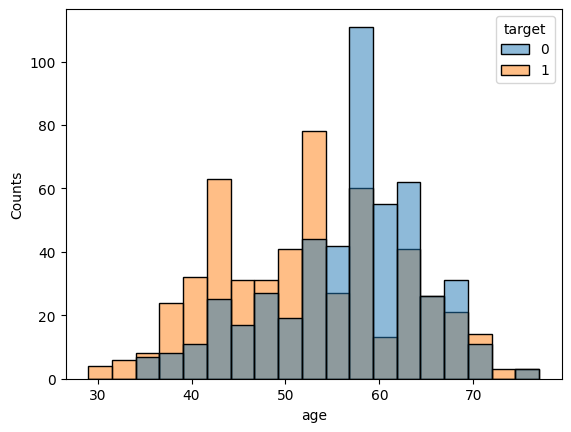

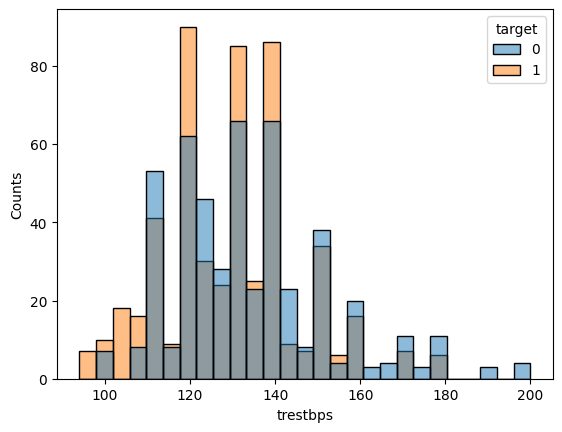

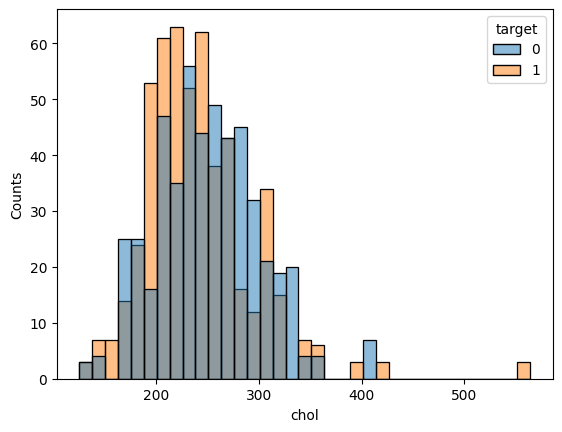

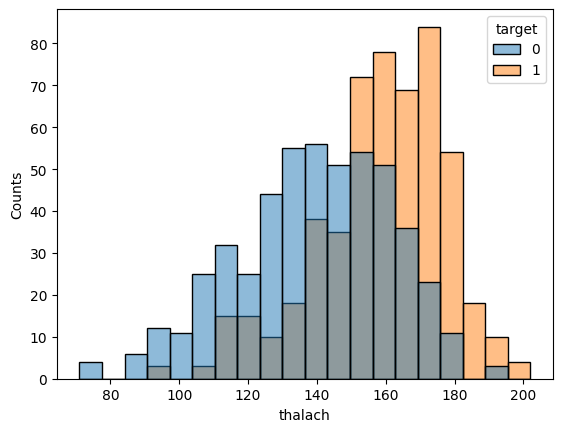

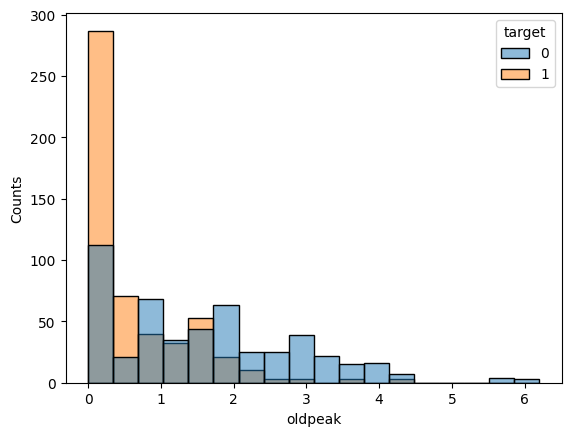

In [10]:
for feat in cont_feat:
  data2 = data.copy()
  sns.histplot(data = data2, x = feat, hue = "target")
  plt.xlabel(feat)
  plt.ylabel("Counts")
  plt.show()

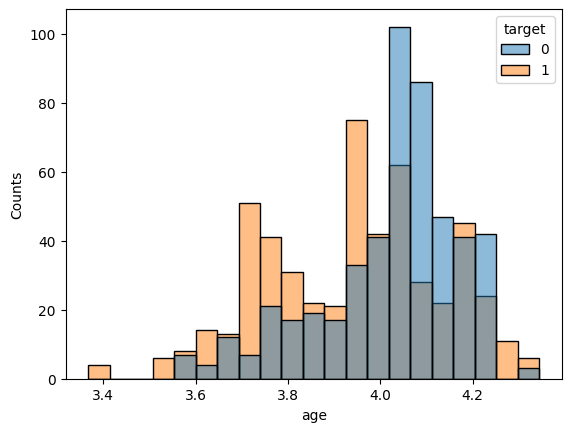

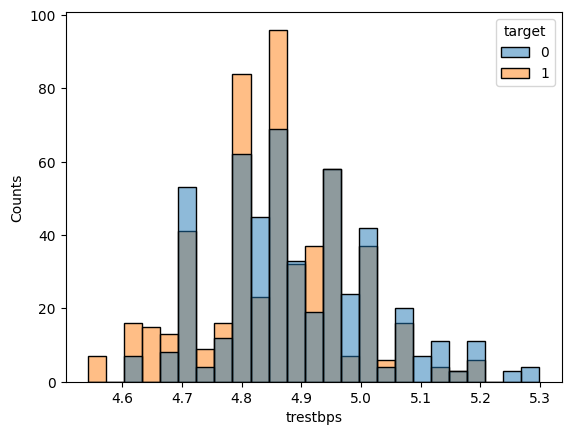

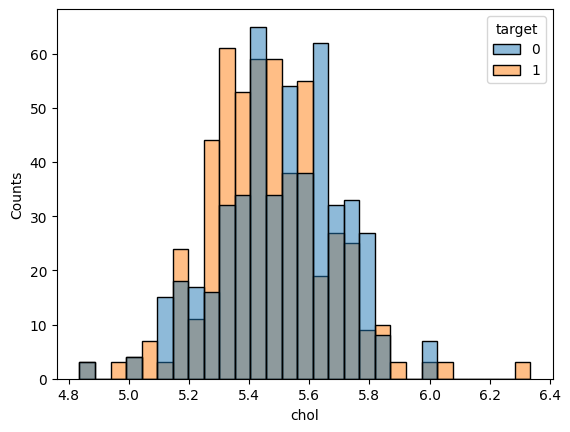

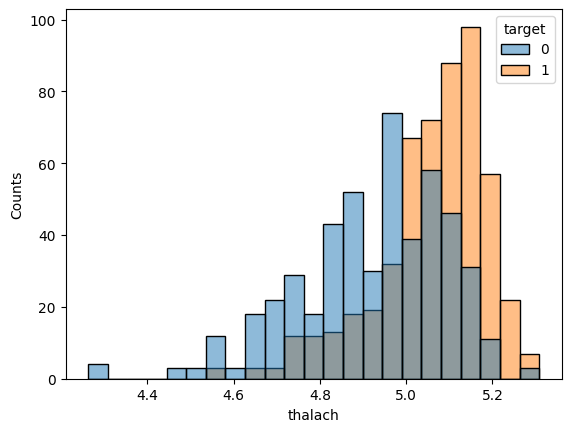

In [11]:
for feat in cont_feat:
  data2 = data.copy()
  if 0 in data[feat].unique():
    pass
  else:
    data2[feat] = np.log(data2[feat])
    sns.histplot(data = data2, x = feat, hue = "target")
    plt.xlabel(feat)
    plt.ylabel("Counts")
    plt.show()

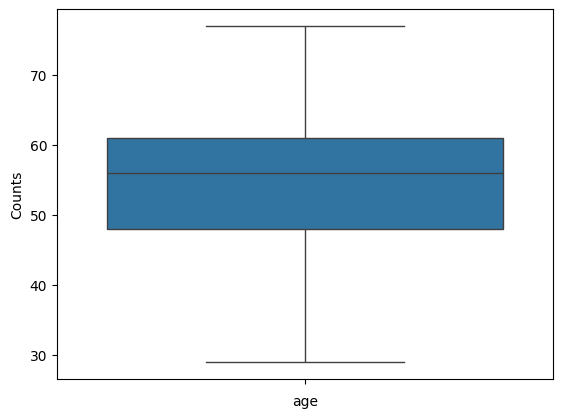

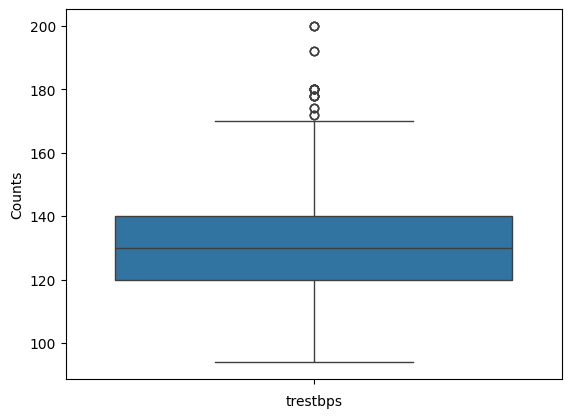

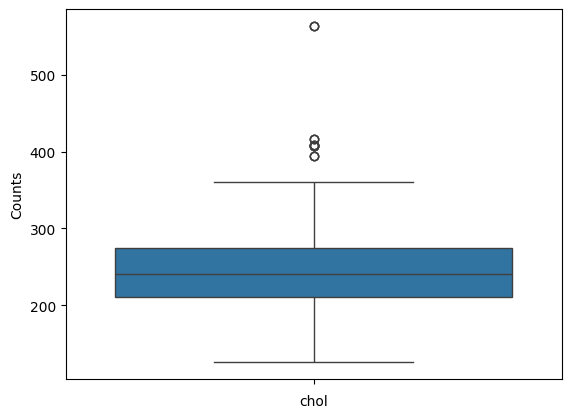

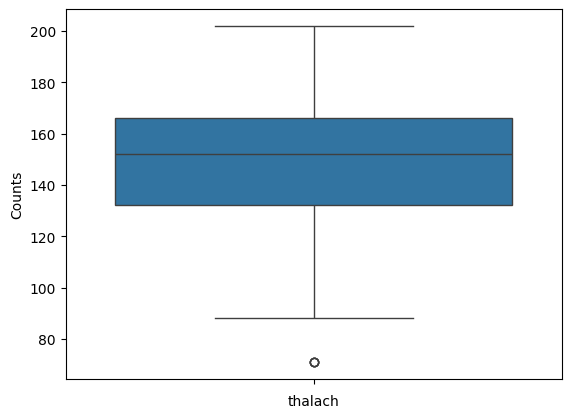

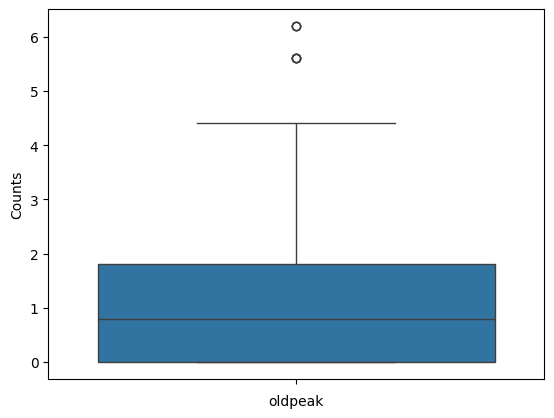

In [12]:
for feat in cont_feat:
  data2 = data.copy()
  sns.boxplot(data2[feat])
  plt.xlabel(feat)
  plt.ylabel("Counts")
  plt.show()

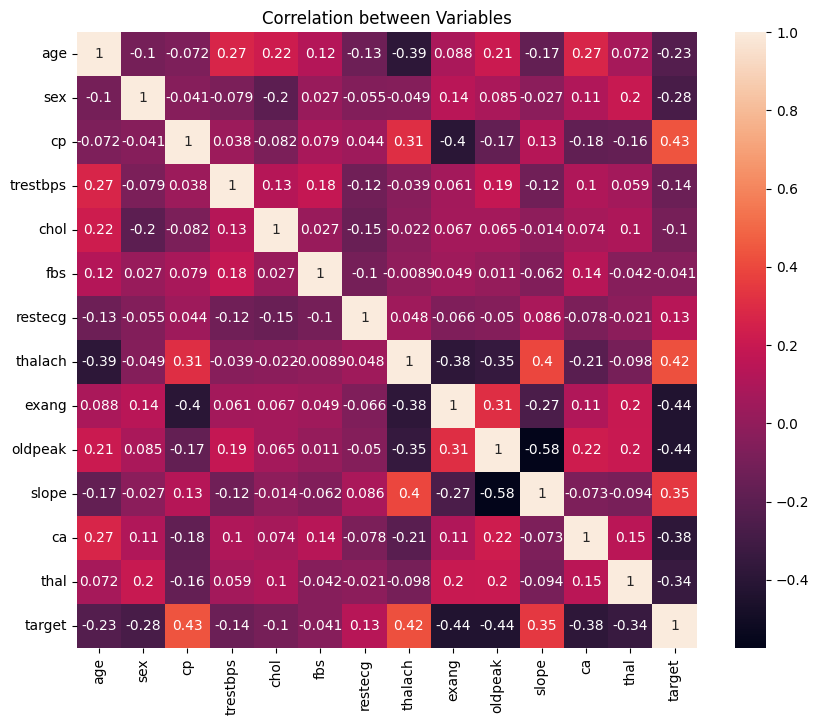

In [13]:
plt.figure(figsize = (10, 8))
sns.heatmap(data.corr(), annot = True)
plt.title("Correlation between Variables")
plt.show()

In [14]:
ind_var = []
for column in data.columns:
    if column == "target":
        pass
    else:
        ind_var.append(column)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[ind_var] = scaler.fit_transform(data[ind_var])
X = data.drop(columns = ["target"], axis =1)
y = data["target"]

In [16]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.479167,1.0,0.000000,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000
1,0.500000,1.0,0.000000,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000
2,0.854167,1.0,0.000000,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000
3,0.666667,1.0,0.000000,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000
4,0.687500,0.0,0.000000,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,1.0,0.333333,0.433962,0.216895,0.0,0.5,0.709924,1.0,0.000000,1.0,0.00,0.666667
1021,0.645833,1.0,0.000000,0.292453,0.301370,0.0,0.0,0.534351,1.0,0.451613,0.5,0.25,1.000000
1022,0.375000,1.0,0.000000,0.150943,0.340183,0.0,0.0,0.358779,1.0,0.161290,0.5,0.25,0.666667
1023,0.437500,0.0,0.000000,0.150943,0.292237,0.0,0.0,0.671756,0.0,0.000000,1.0,0.00,0.666667


In [29]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 0)


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, fbeta_score, classification_report
logreg = LogisticRegression()
logreg.fit(train_X, train_y)

LogisticRegression()

In [31]:
log_pred = logreg.predict(val_X)
accuracy = accuracy_score(val_y, log_pred)

accuracy

0.8441558441558441

In [32]:
f_score = fbeta_score(val_y, log_pred, beta = 1)
f_score

0.852760736196319

In [33]:
print(confusion_matrix(val_y, log_pred))

[[121  29]
 [ 19 139]]


In [34]:
print(classification_report(val_y, log_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       150
           1       0.83      0.88      0.85       158

    accuracy                           0.84       308
   macro avg       0.85      0.84      0.84       308
weighted avg       0.85      0.84      0.84       308



In [35]:
from sklearn.neighbors import KNeighborsClassifier as KNN
error_rate = []
for i in range(1, 20):
    model = KNN(n_neighbors = i)
    model.fit(train_X, train_y)
    pred_y = model.predict(val_X)
    error = np.mean(pred_y != val_y)
    error_rate.append(error)
error_rate

[np.float64(0.03896103896103896),
 np.float64(0.09090909090909091),
 np.float64(0.09740259740259741),
 np.float64(0.13636363636363635),
 np.float64(0.18181818181818182),
 np.float64(0.17857142857142858),
 np.float64(0.15584415584415584),
 np.float64(0.14285714285714285),
 np.float64(0.12012987012987013),
 np.float64(0.1266233766233766),
 np.float64(0.1396103896103896),
 np.float64(0.1331168831168831),
 np.float64(0.1331168831168831),
 np.float64(0.1331168831168831),
 np.float64(0.12987012987012986),
 np.float64(0.15584415584415584),
 np.float64(0.1461038961038961),
 np.float64(0.15584415584415584),
 np.float64(0.1461038961038961)]

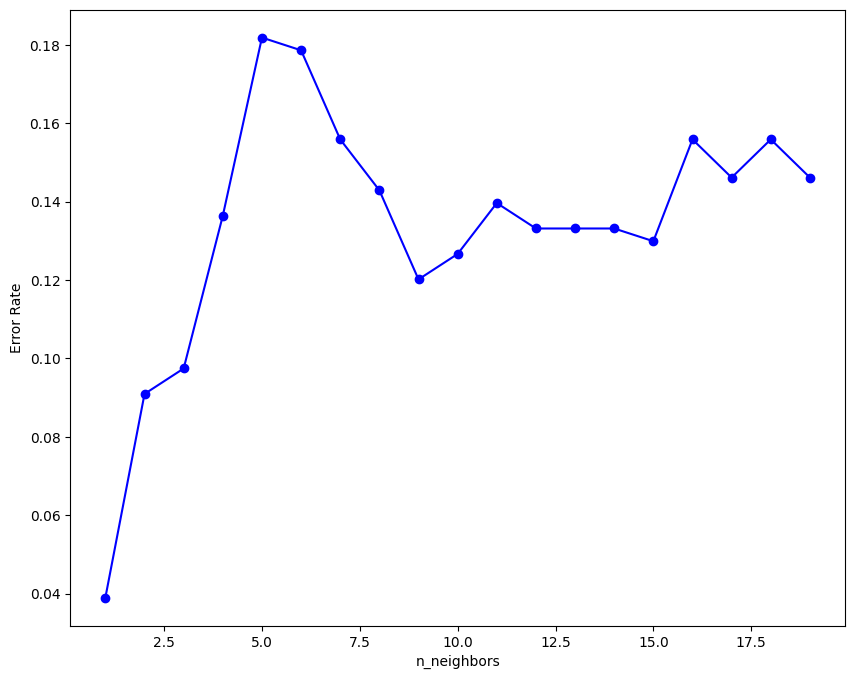

In [36]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, 20), error_rate, color = "blue", marker = "o")
plt.xlabel("n_neighbors")
plt.ylabel("Error Rate")
plt.show()

In [37]:
knn = KNN(n_neighbors = 9)
knn.fit(train_X, train_y)
k_pred = knn.predict(val_X)
print(accuracy_score(k_pred, val_y))

0.8798701298701299


In [38]:
print(fbeta_score(k_pred, val_y, beta = 1))

0.8794788273615635


In [39]:
print(confusion_matrix(k_pred, val_y))

[[136  23]
 [ 14 135]]


In [40]:
print(classification_report(k_pred, val_y))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       159
           1       0.85      0.91      0.88       149

    accuracy                           0.88       308
   macro avg       0.88      0.88      0.88       308
weighted avg       0.88      0.88      0.88       308



In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
error_rate = []
for i in range(1, 15):
    model = DecisionTreeClassifier(criterion = "gini", max_depth= i )
    model.fit(train_X, train_y)
    pred_y = model.predict(val_X)
    error = np.mean(pred_y != val_y)
    error_rate.append(error)
error_rate

[np.float64(0.22402597402597402),
 np.float64(0.22402597402597402),
 np.float64(0.18831168831168832),
 np.float64(0.14285714285714285),
 np.float64(0.11038961038961038),
 np.float64(0.06493506493506493),
 np.float64(0.04220779220779221),
 np.float64(0.032467532467532464),
 np.float64(0.00974025974025974),
 np.float64(0.00974025974025974),
 np.float64(0.00974025974025974),
 np.float64(0.00974025974025974),
 np.float64(0.00974025974025974),
 np.float64(0.00974025974025974)]

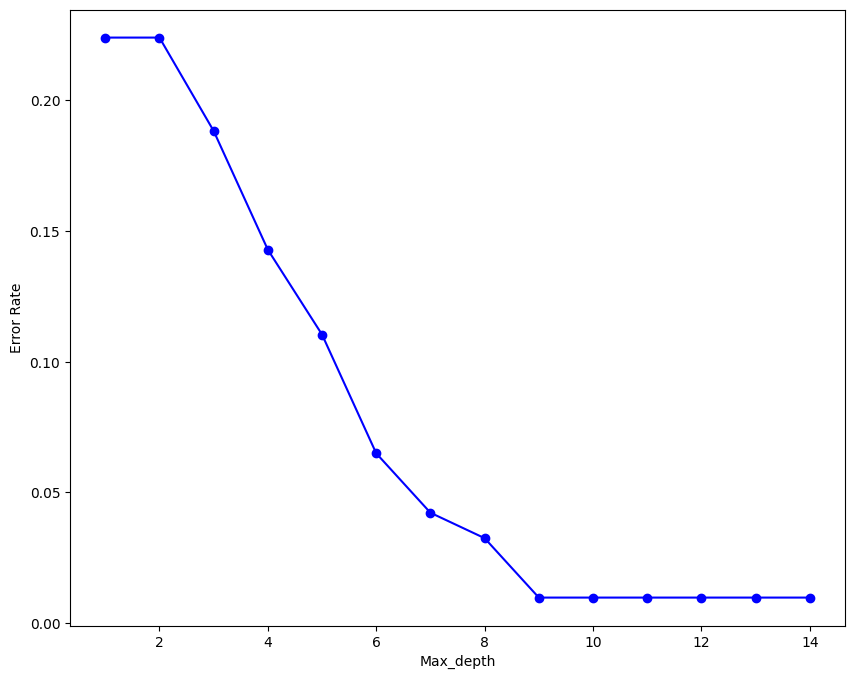

In [61]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, 15), error_rate, color = "blue", marker = "o")
plt.xlabel("Max_depth")
plt.ylabel("Error Rate")
plt.show()

In [62]:
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=9)
dtc.fit(train_X, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [63]:
print(dtc.score(train_X, train_y))

0.99721059972106


In [64]:
print(dtc.score(val_X, val_y))

0.9837662337662337


In [65]:
tree_pred = dtc.predict(val_X)
print(accuracy_score(tree_pred, val_y))

0.9837662337662337


In [66]:
print(fbeta_score(tree_pred, val_y, beta = 1))

0.9841269841269841


In [67]:
print(confusion_matrix(tree_pred, val_y))

[[148   3]
 [  2 155]]


In [68]:
print(classification_report(tree_pred, val_y))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       151
           1       0.98      0.99      0.98       157

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308

